<a href="https://colab.research.google.com/github/danyfatihul-14/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [25]:
def convolution2d(image, kernel, stride=1, padding=1):
    # Menambahkan padding ke citra (gunakan padding 1 untuk menjaga ukuran gambar)
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    # Mendapatkan dimensi citra dan kernel
    image_height, image_width = image_padded.shape
    kernel_height, kernel_width = kernel.shape

    # Menghitung dimensi output
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1

    # Membuat output array
    output = np.zeros((output_height, output_width))

    # Melakukan konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Mengambil region dari citra yang akan dikonvolusi
            region = image_padded[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width]
            # Melakukan perkalian elemen dan penjumlahan
            output[y, x] = np.sum(region * kernel)

    # Normalisasi nilai hasil agar tetap dalam rentang 0-255
    output = np.clip(output, 0, 255)

    return output

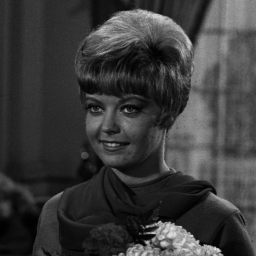

In [11]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [12]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

In [26]:
convolution2d(img_gray, kernel_sharpen,1,2)

array([[ 94., 131., 128., ..., 255., 131.,   0.],
       [ 49., 143.,  85., ..., 255., 133.,   0.],
       [ 38.,  87.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 27.,  45.,  27., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

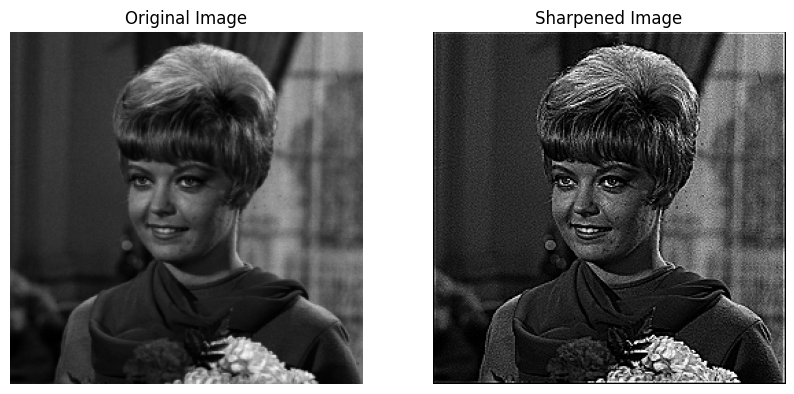

In [32]:
kernel_sharpen_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Terapkan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen_sharpen,1,2)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar yang sudah di-sharpen
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

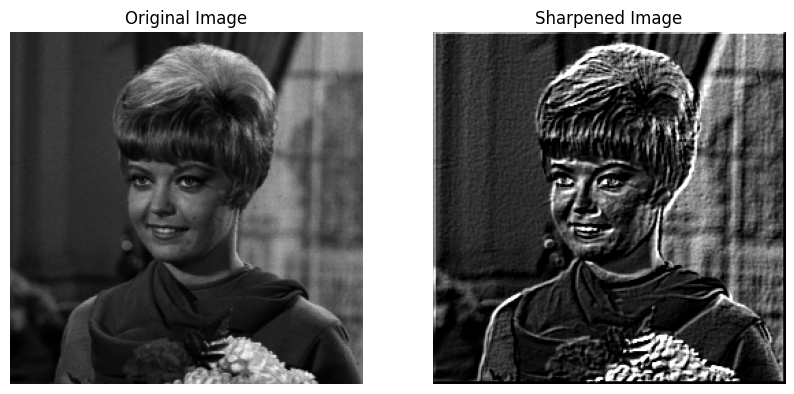

In [33]:
kernel_sharpen_emboss = np.array([[ -2, -1, 0],
                           [-1,  1, 1],
                           [ 0, 1, 2]])

# Terapkan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen_emboss,1,2)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar yang sudah di-sharpen
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

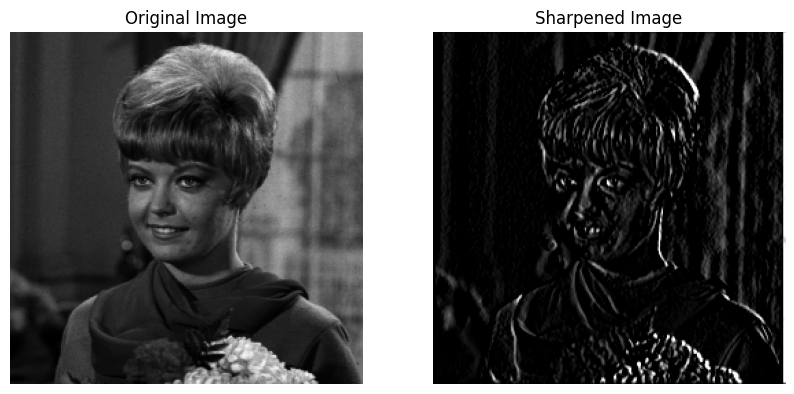

In [34]:
kernel_sharpen_LeftSobelEdgeDetection  = np.array([[1, 0, -1],
                           [2,  0, -2],
                           [1, 0, -1]])

# Terapkan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen_LeftSobelEdgeDetection ,1,2)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar yang sudah di-sharpen
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

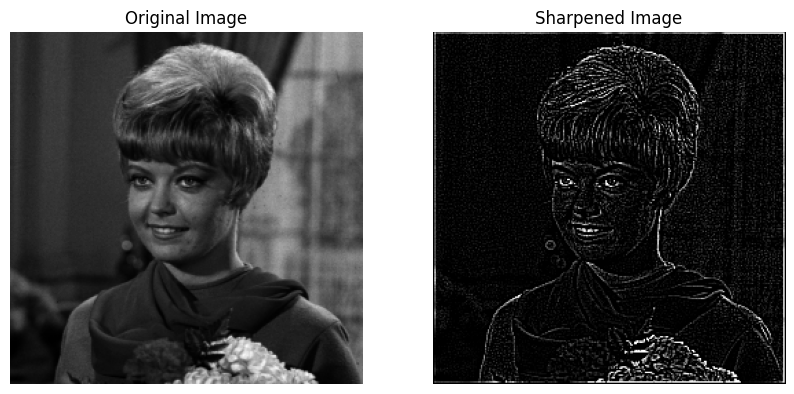

In [36]:
kernel_sharpen_CannyEdgeDetection  = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

# Terapkan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen_CannyEdgeDetection ,1,2)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar yang sudah di-sharpen
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

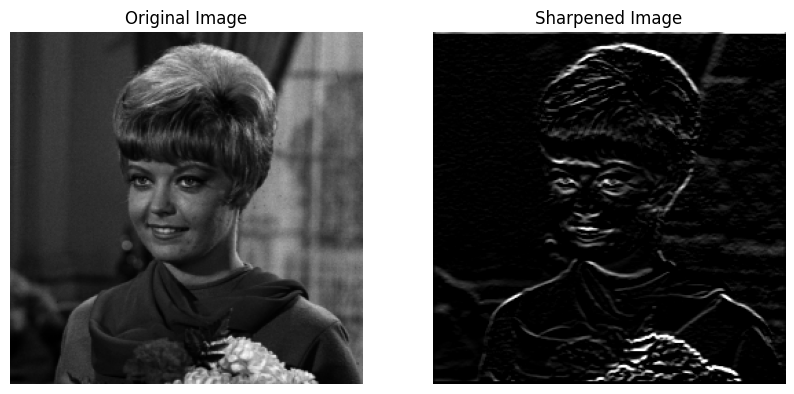

In [37]:
kernel_sharpen_PrewitEdgeDetection  = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])

# Terapkan konvolusi
sharpened_image = convolution2d(img_gray, kernel_sharpen_PrewitEdgeDetection ,1,2)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar yang sudah di-sharpen
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

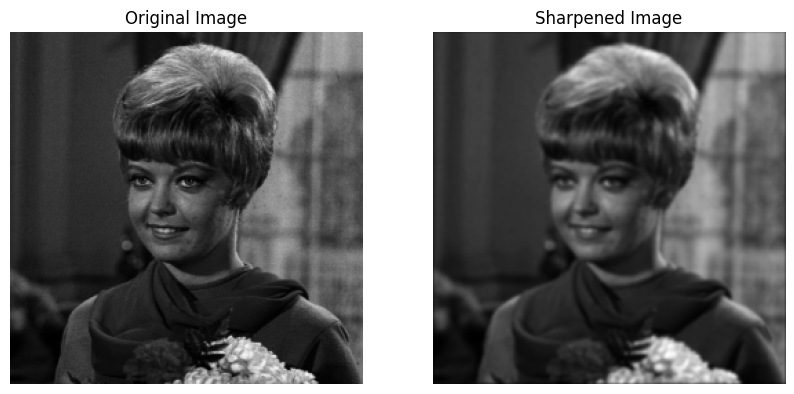

In [39]:
kernel_gaussian_5x5 = np.array([[1,  4,  6,  4,  1],
                                [4, 16, 24, 16,  4],
                                [6, 24, 36, 24,  6],
                                [4, 16, 24, 16,  4],
                                [1,  4,  6,  4,  1]]) / 256

# Terapkan konvolusi
sharpened_image = convolution2d(img_gray, kernel_gaussian_5x5 ,1,2)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar yang sudah di-sharpen
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

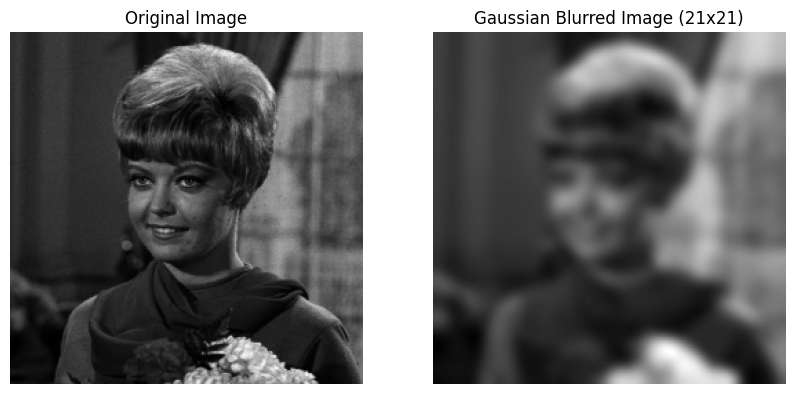

In [41]:
# Fungsi untuk menghasilkan kernel Gaussian 21x21
def generate_gaussian_kernel(kernel_size):
    sigma = math.sqrt(kernel_size)  # Menghitung sigma berdasarkan ukuran kernel
    gaussian_kernel_1d = cv.getGaussianKernel(kernel_size, sigma)  # Gaussian 1D kernel
    gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T  # Gaussian 2D kernel
    return gaussian_kernel_2d

# Ukuran kernel 21x21
kernel_size = 21

# Generate Gaussian kernel 21x21
gaussian_kernel = generate_gaussian_kernel(kernel_size)

# Baca gambar (gunakan gambar grayscale)
image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Terapkan konvolusi dengan kernel Gaussian 21x21
blurred_image = cv.filter2D(image, -1, gaussian_kernel)

# Tampilkan gambar asli dan hasil Gaussian Blur
plt.figure(figsize=(10,5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Gambar setelah Gaussian Blur
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian Blurred Image (21x21)")
plt.axis('off')

plt.show()